In [ ]:
import importlib
import lane_detection
import lane_following

importlib.reload(lane_detection)
importlib.reload(lane_following)

from lane_detection import detect_lines, draw_lines, get_slopes_intercepts, detect_lanes, draw_lanes, IMAGE_WIDTH, IMAGE_HEIGHT
from lane_following import get_lane_center, recommend_direction

import cv2
import numpy as np
import matplotlib.pyplot as plt

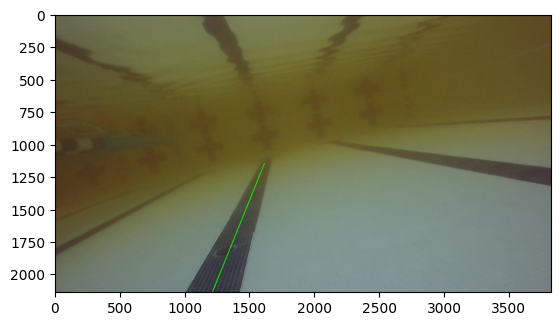

In [5]:
img = cv2.imread('lanes.png')

lines = detect_lines(img, threshold1=20, threshold2=60, aperture_size=3, minLineLength=200, maxLineGap=25)
#result = draw_lines(img, lines)
lanes = detect_lanes(lines)
result = draw_lanes(img, lanes)

intercept, slope = get_lane_center(lanes)

cv2.line(result, (int(intercept), IMAGE_HEIGHT), (int(intercept) + 400, IMAGE_HEIGHT + int(400 * slope)), (0, 255, 0), 5)
plt.imshow(result)